# Convolutional Neural Networks (ConvNets)

ConvNets are a specific type of architecture for dealing with images, being a strong arm for computer vision models. The main differences between a traditional neural network and a CNN are two types of layers: __convolutions__ and __pooling__.

<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width=600>

## Convolutions

The convolutions aim to highlight elements in the images that are relevant by applying filters. The way the filter works would be like a mathematical transformation between matrices:

<img src="https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif" width=500>

With these filters, it is possible to create the so-called __feature maps__ or attribute maps, which would be new highlighted images at certain points in the image according to the filters to be applied:

<img src="https://miro.medium.com/max/875/1*ixuhX9vaf1kUQTWicVYiyg.png" width=900>

## Pooling

The _Pooling_ layer or also called Subsampling, helps to select the main elements of an image ensuring that it is representative of the original image. So given a window of application of the subsampling, the model goes through the entire image applying some type of aggregation, such as average, maximum or even sum:

<img src="https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width=600>

<img src="https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1/_/attachment/inline/e60e56a6-8bcd-4b61-880d-7c621e2cb1d5:6595a68471ed37621734130ca2cb7997a1502a2b/Pooling.gif" width=600>

The Application of _Pooling_ helps the network in the sense of maintaining certain relevant points of the image, but at the same time helps to generalize to the other images.

<img src = "https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-2/_/attachment/inline/607c9f97-d102-4025-9d6d-4149831f1bc2:7486b2c8566539842998faeec3cd28d2d0aa5360/Screenshot%202019-07-01%20at%2019.43.59.png" width=800>

Note that doing these processes always involves reducing the size or quality of the image, but we can avoid this type of effect by using two auxiliary techniques that are __zero-padding__ and __stride__.

- _Zero-Padding_: Consists of adding a layer of zeros around the image in order to preserve the size of the image before convolutions or subsampling and without adding bias to the transformation:

<img src = "https://deeplizard.com/assets/jpg/2b25a0c1.jpg" width=800>

- _Stride_: Consists of determining "jumps" during the application of filter windows, these jumps being both vertically and horizontally:

<img src = "https://miro.medium.com/max/1400/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif" width=600>

##  Example - Fashion MNIST

Let's revisit the MNIST exercise now using a CNN to evaluate the images:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

### Data Preprocessing

In [13]:
train_images = train_images / train_images.max()
test_images = test_images / train_images.max()

In [14]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [16]:
cnn.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3990 - accuracy: 0.8593
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2707 - accuracy: 0.9018
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2270 - accuracy: 0.9172
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1934 - accuracy: 0.9282
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1687 - accuracy: 0.9375


In [17]:
pred_labels_cnn = np.argmax(cnn.predict(test_images), axis = -1)
pred_labels_cnn

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [18]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(pred_labels_cnn, test_labels))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       945
           1       0.98      0.99      0.98       994
           2       0.70      0.90      0.79       781
           3       0.87      0.92      0.90       944
           4       0.95      0.68      0.79      1393
           5       0.98      0.92      0.95      1063
           6       0.69      0.73      0.71       941
           7       0.90      0.97      0.93       928
           8       0.98      0.98      0.98      1001
           9       0.96      0.95      0.96      1010

    accuracy                           0.88     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.89      0.88      0.88     10000



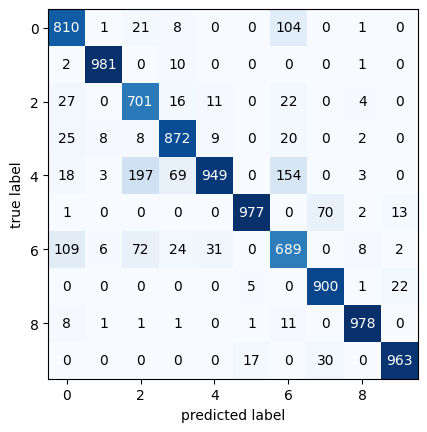

In [19]:
cm = confusion_matrix(pred_labels_cnn, test_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()